# <b>CS156 (Introduction to AI), Spring 2022</b>
# <u><b>Homework 9 submission</b></u>

### Roster Name: Kwangoh Kang
### Preferred Name (if different): I can go by Ian too
### Student ID: 014808703
### Email address: kwangoh.kang@sjsu.edu
Any special notes or anything you would like to communicate to me about this homework submission goes in here.

##  <u>References and sources </u>

Provided example file on Canvas class page

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np
from tensorflow.keras.layers import Dense, Input, Conv2D, LSTM, MaxPool2D, UpSampling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from numpy import argmax, array_equal
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Model
from random import randint
import pandas as pd
import numpy as np
from tensorflow.keras import layers
from PIL import Image
from tensorflow.keras import regularizers
from tensorflow.keras import backend
from datetime import datetime

In [2]:
np.random.seed(42)

#### Code the solution

In [3]:
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train_valid, y_train_valid), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_validation, y_train, y_validation = train_test_split(x_train_valid, y_train_valid, test_size=0.2, random_state=0)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_validation = x_validation.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train.shape, x_validation.shape, x_test.shape

4431872/4422102 [==============================] - 0s 0us/step


((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

In [4]:
 #Reshape the images into flat ANN layers
x_train_flat = x_train.reshape(-1, 784)
x_validation_flat = x_validation.reshape(-1, 784)
x_test_flat = x_test.reshape(-1, 784)
x_train_flat.shape, x_validation_flat.shape, x_test_flat.shape


((48000, 784), (12000, 784), (10000, 784))

In [5]:
input_layer = Input(shape=(784,))   # 28*28
encoded = layers.Dense(128, activation='relu')(input_layer)
encoded = layers.Dense(64, activation='relu')(encoded)

encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

# reconstruction model:
autoencoder = keras.Model(input_layer, decoded)

# encoder model:
encoder = keras.Model(input_layer, encoded)

# decoder model:
encoded_input = keras.Input(shape=(32,))
decoder_layer = autoencoder.layers[-3]  # last layer of autoencoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136

In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train_flat, x_train_flat,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_test_flat, x_test_flat))

Epoch 1/30
24/24 [==============================] - 3s 98ms/step - loss: 0.6016 - val_loss: 0.4924
Epoch 2/30
24/24 [==============================] - 2s 90ms/step - loss: 0.4404 - val_loss: 0.4013
Epoch 3/30
24/24 [==============================] - 2s 90ms/step - loss: 0.3836 - val_loss: 0.3708
Epoch 4/30
24/24 [==============================] - 2s 88ms/step - loss: 0.3587 - val_loss: 0.3486
Epoch 5/30
24/24 [==============================] - 2s 91ms/step - loss: 0.3396 - val_loss: 0.3324
Epoch 6/30
24/24 [==============================] - 2s 92ms/step - loss: 0.3268 - val_loss: 0.3241
Epoch 7/30
24/24 [==============================] - 2s 91ms/step - loss: 0.3197 - val_loss: 0.3192
Epoch 8/30
24/24 [==============================] - 2s 89ms/step - loss: 0.3168 - val_loss: 0.3164
Epoch 9/30
24/24 [==============================] - 2s 90ms/step - loss: 0.3128 - val_loss: 0.3136
Epoch 10/30
24/24 [==============================] - 2s 92ms/step - loss: 0.3109 - val_loss: 0.3117
Epoch 11/

In [7]:
#encoded_imgs = encoder.predict(x_test_flat)
#decoded_imgs = decoder.predict(encoded_imgs)

encoded_imgs = encoder.predict(x_test_flat)
decoded_imgs = decoder.predict(encoded_imgs)

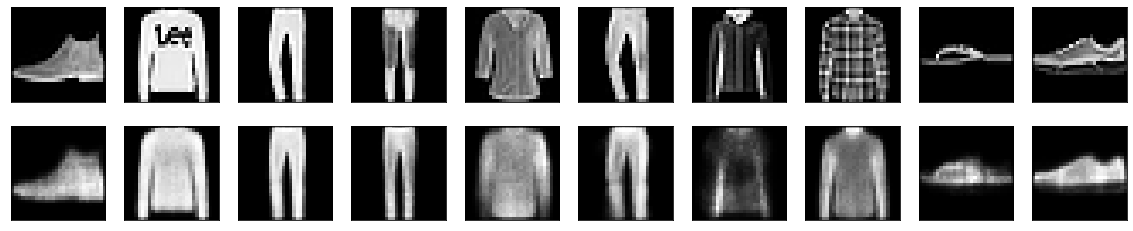

In [10]:
predictions = autoencoder.predict(x_test_flat)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [11]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_validation_noisy = x_validation + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_validation.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_validation_noisy = np.clip(x_validation_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

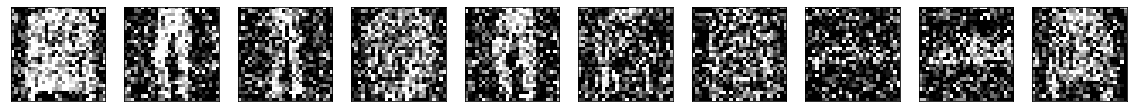

In [12]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [13]:
input_layer = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248

In [15]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=20,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_validation_noisy, x_validation))

Epoch 1/20
24/24 [==============================] - 106s 4s/step - loss: 0.5542 - val_loss: 0.4124
Epoch 2/20
24/24 [==============================] - 106s 4s/step - loss: 0.3708 - val_loss: 0.3429
Epoch 3/20
24/24 [==============================] - 106s 4s/step - loss: 0.3355 - val_loss: 0.3292
Epoch 4/20
24/24 [==============================] - 106s 4s/step - loss: 0.3269 - val_loss: 0.3234
Epoch 5/20
24/24 [==============================] - 106s 4s/step - loss: 0.3219 - val_loss: 0.3193
Epoch 6/20
24/24 [==============================] - 106s 4s/step - loss: 0.3183 - val_loss: 0.3170
Epoch 7/20
24/24 [==============================] - 106s 4s/step - loss: 0.3160 - val_loss: 0.3143
Epoch 8/20
24/24 [==============================] - 106s 4s/step - loss: 0.3143 - val_loss: 0.3128
Epoch 9/20
24/24 [==============================] - 106s 4s/step - loss: 0.3127 - val_loss: 0.3115
Epoch 10/20
24/24 [==============================] - 106s 4s/step - loss: 0.3115 - val_loss: 0.3105
Epoch 11/

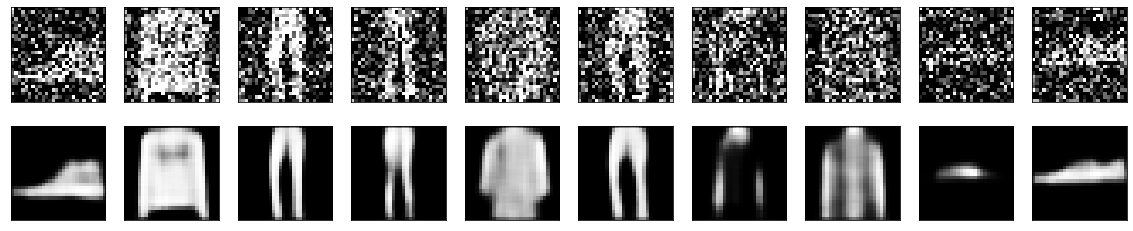

In [16]:
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # noisy
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()